In [33]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib              
import matplotlib.pyplot as plt
%matplotlib inline

#importing mnist database
mnist =tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

#Loading our saved model for testing.
from tensorflow.keras.models import load_model  
model=load_model('msc project 2/Handwritten-Digit-And-Character-Recognition-main/Project/saved_model.h5')

# Explanation of the testing process

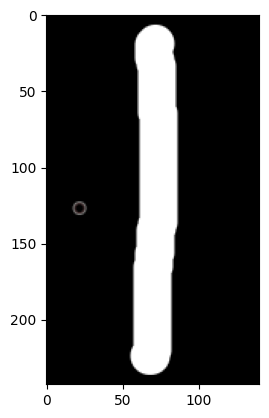

In [34]:
img=cv2.imread('test_sample/model_testing_#1.png')                 #reading the image input
plt.imshow(img)

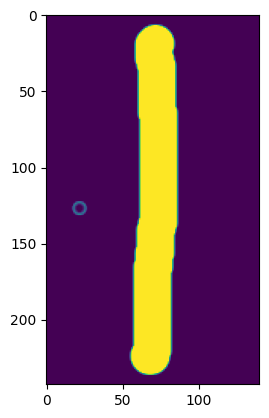

In [35]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)                         #converting the image to gray scale
plt.imshow(gray)

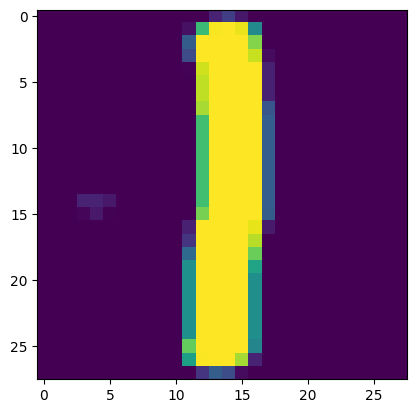

In [36]:
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)   #resizing our image for using convolution.
plt.imshow(resized)

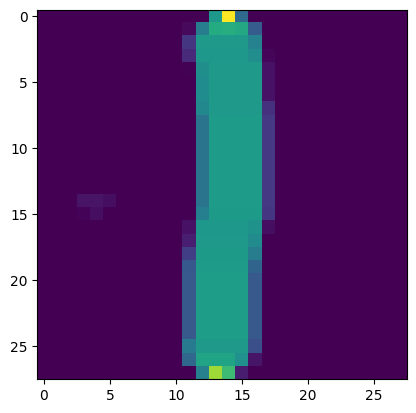

In [37]:
newimg=tf.keras.utils.normalize(resized)                          #normalizing the data.
plt.imshow(newimg)

In [38]:
newimg=np.array(newimg).reshape(-1,28,28,1)                      #kernal operation for convolution layer.
newimg.shape                                                     #displaying the shape of resultent image.

(1, 28, 28, 1)

In [39]:
predictions=model.predict(newimg) 
print("models prediction is:",np.argmax(predictions))            #displaying the model's prediction for our image. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
models prediction is: 1


#  Cheking the input image and Pridicting the result [TESTING]

In [40]:
#importing the function from python  file for testing.
from testing_function import get_prediction

## #>Testing on MNIST database images:

### Test_Case #1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


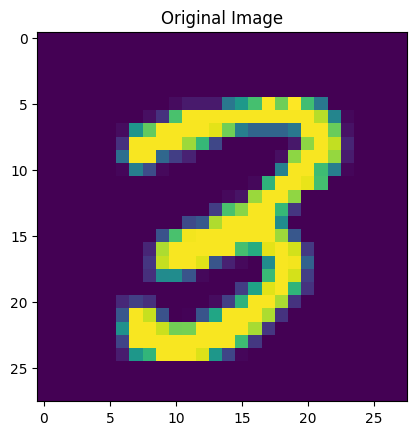

Digit in the image[according to model] is: 3


(<matplotlib.image.AxesImage at 0x234008260f0>,
 Text(0.5, 1.0, 'Original Image'),
 None,
 None)

In [41]:
image=x_train[59001]
get_prediction(image)

### Test_Case #2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


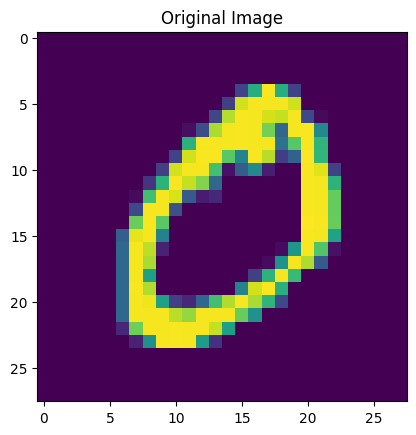

Digit in the image[according to model] is: 0


(<matplotlib.image.AxesImage at 0x23400953cb0>,
 Text(0.5, 1.0, 'Original Image'),
 None,
 None)

In [42]:
image=x_train[1]
get_prediction(image)

### Test_Case #3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


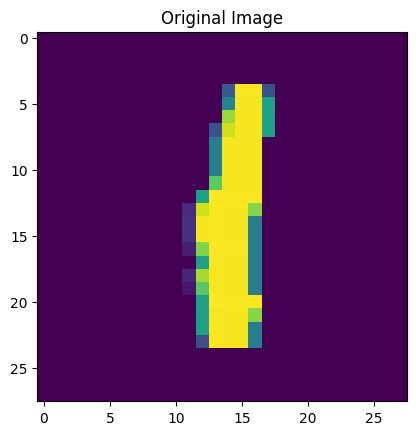

Digit in the image[according to model] is: 1


(<matplotlib.image.AxesImage at 0x23400acd9d0>,
 Text(0.5, 1.0, 'Original Image'),
 None,
 None)

In [43]:
image=x_train[128]
get_prediction(image)

## #>Testing on real life images:

### Test_Case #1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


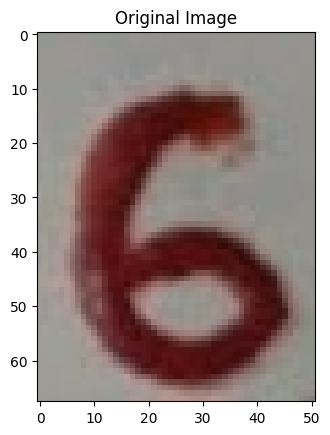

Digit in the image[according to model] is: 3


(<matplotlib.image.AxesImage at 0x23400b11550>,
 Text(0.5, 1.0, 'Original Image'),
 None,
 None)

In [44]:
#predicting the digit from our model
image='test_sample/model_testing_#6.jpg'
get_prediction(image)

### Test_Case #2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


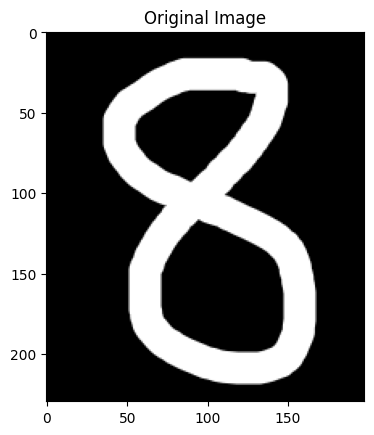

Digit in the image[according to model] is: 8


(<matplotlib.image.AxesImage at 0x234008a5a30>,
 Text(0.5, 1.0, 'Original Image'),
 None,
 None)

In [45]:
#predicting the digit from our model
image='test_sample/model_testing_#8.png'
get_prediction(image)

### Test_Case #3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


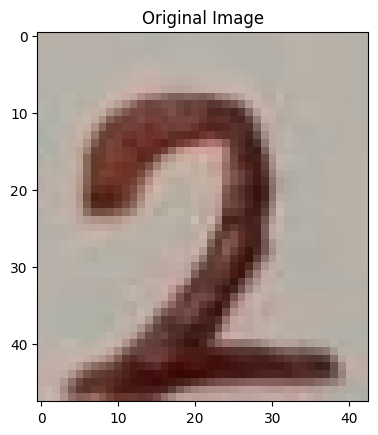

Digit in the image[according to model] is: 6


(<matplotlib.image.AxesImage at 0x23400bdb6b0>,
 Text(0.5, 1.0, 'Original Image'),
 None,
 None)

In [46]:
#predicting the digit from our model
image='test_sample/model_testing_#2.jpg'
get_prediction(image)

In [47]:
import anvil.server #W4XCYK2JEW3AICLDAOPALTTC

In [32]:
!pip install anvil-uplink


  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [49]:
anvil.server.connect('server_RBBDGR7QJRIUXAZJIHJM5PJY-XNOPKNUSGMX6MEOF')

Connecting to wss://anvil.works/uplink


AttributeError: module 'ssl' has no attribute 'wrap_socket'

In [50]:
import anvil.media

@anvil.server.callable
def classify(file):
    with anvil.media.TempFile(file) as filename:
        img=cv2.imread(filename)
        
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

        newimg=tf.keras.utils.normalize(resized)            #normalizing the data.

        newimg=np.array(newimg).reshape(-1,28,28,1)         #kernal operation for convolution layer.      

        predicions=model.predict(newimg)                    #pridicting the digit.   

        return np.argmax(predicions)
       

## `****** Model is also working fine for real time rgb images of digits ******`